# 학원 주변 고깃집

In [106]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import statsmodels as sm
%matplotlib inline

## 데이터 분류

In [4]:
# 데이터 가져오기 1420개 데이터
df_ori = pd.read_csv('./ZMS_200701.csv')
df_ori.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        1420 non-null   object 
 1   category    1420 non-null   object 
 2   address     1420 non-null   object 
 3   score       1420 non-null   float64
 4   eval_cnt    1420 non-null   int64  
 5   review_cnt  1420 non-null   int64  
 6   lat         1420 non-null   float64
 7   lng         1420 non-null   float64
 8   distance    1420 non-null   float64
 9   ZMS         1420 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 111.1+ KB


In [5]:
# 카테고리 파악하기
df_ori.category.unique()

array(['호프,요리주점', '게,대게', '양식', '족발,보쌈', '해산물뷔페', '순대', '곱창,막창', '일본식라면',
       '이탈리안', '찌개,전골', '초밥,롤', '두부전문점', '국수', '퓨전일식', '중화요리', '햄버거',
       '냉면', '한식', '설렁탕', '육류,고기', '해물,생선', '곰탕', '제과,베이커리', '굴,전복',
       '돈까스,우동', '닭요리', '카페', '멕시칸,브라질', '장어', '갈비', '치킨', '분식', '스테이크,립',
       '일식', '한정식', '삼계탕', '피자', '베트남음식', '동남아음식', '테마카페', '쌈밥', '커피전문점',
       '일본식주점', '떡볶이', '인도음식', '샤브샤브', '중식', '불고기,두루치기', '일식집', '고양이카페',
       '디저트카페', '참치회', '오리', '샌드위치', '퓨전한식', '복어', '칵테일바', '패밀리레스토랑',
       '국밥', '퓨전요리', '푸드코트', '양꼬치', '삼겹살', '실내포장마차', '회', '도시락', '도넛',
       '해장국', '매운탕,해물탕', '추어', '감자탕', '아구', '북카페', '한식뷔페', '수제비',
       '사철탕,영양탕', '와인바', '패스트푸드', '떡,한과', '조개', '죽', '생과일전문점', '해산물',
       '뷔페', '태국음식', '만화카페', '토스트', '아이스크림', '보드카페', '술집', '퓨전중식',
       '아시아음식', '닭강정', '오뎅바', '고기뷔페'], dtype=object)

 - 위 결과 중 고깃집에 해당하는 결과를 찾는다.
 
 
 - '곱창,막창','육류,고기','갈비','삼겹살','양꼬치','고기뷔페'

In [6]:
# 한식 중 고깃집이 포함되었을 수도 있다는 생각에 둘러보았다.
df_ori[df_ori.category == '한식']

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,ZMS
18,봉피양 서초점,한식,서초동 1330,3.4,163,59,37.493924,127.027900,1043.735911,70.08
93,서진식당,한식,역삼동 824-25,4.4,22,51,37.497514,127.031060,1530.325117,55.47
99,남도애찬,한식,역삼동 830-27,5.0,15,46,37.494062,127.031806,1293.801806,55.17
142,장서는날 본점,한식,역삼동 827-68,2.8,81,110,37.495671,127.032183,1439.916728,50.85
251,에덴식당 강남점,한식,역삼동 825-20,4.3,12,38,37.497717,127.029147,1454.863859,43.91
260,서석대,한식,서초동 1678-1,3.4,24,8,37.495057,127.019408,958.152254,43.52
292,백화요란골동반,한식,서초동 1542-1,3.9,14,29,37.491362,127.008348,1213.741283,42.22
310,이모네맷돌 녹두빈대떡,한식,서초동 1337-14,4.7,9,4,37.492195,127.029043,973.573941,41.30
319,고등어식당,한식,역삼동 824-25,4.5,10,1,37.497514,127.031060,1530.325117,40.90
323,로스옥 양재점,한식,도곡동 952-8,3.1,24,41,37.485989,127.033925,1171.527618,40.70


In [142]:
# 위 카테고리에 해당하는 행만 따로 모으자
gogizip = ['곱창,막창','육류,고기','갈비','삼겹살','양꼬치','고기뷔페']
df_gogi = df_ori[df_ori.category.isin(gogizip)].copy()
df_gogi.head()

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,ZMS
6,세광양대창 교대본점 본관,"곱창,막창",서초동 1571-19,4.7,63,151,37.491970,127.012569,938.172496,79.05
21,탐라도야지,"육류,고기",서초3동 1566-8,4.0,70,220,37.489555,127.013545,714.110608,69.58
26,세광양대창 교대별관,"곱창,막창",서초동 1567-8,4.9,32,29,37.490135,127.013473,752.296173,68.36
32,자인뭉티기,"육류,고기",서초동 1363-7,4.1,60,22,37.485132,127.032110,1021.365821,67.44
34,교대이층집 본점,"육류,고기",서초동 1571-18,3.6,94,222,37.492047,127.012802,928.260707,67.09


In [143]:
# 잘 가져왔는지 확인
df_gogi.category.unique()

array(['곱창,막창', '육류,고기', '갈비', '양꼬치', '삼겹살', '고기뷔페'], dtype=object)

## 데이터 살펴보기

In [144]:
df_gogi.info()
# 172개의 고깃집

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 6 to 1417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        172 non-null    object 
 1   category    172 non-null    object 
 2   address     172 non-null    object 
 3   score       172 non-null    float64
 4   eval_cnt    172 non-null    int64  
 5   review_cnt  172 non-null    int64  
 6   lat         172 non-null    float64
 7   lng         172 non-null    float64
 8   distance    172 non-null    float64
 9   ZMS         172 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 14.8+ KB


In [145]:
# 지도에 위치 찍어보기
import folium
import googlemaps
map = folium.Map(location=[df_gogi['lat'].mean(),df_gogi['lng'].mean()],zoom_start=14)
map

In [146]:
for i in df_gogi.index:
    popup_name = df_gogi.loc[i,'name']
    icon_color = 'green'
    folium.Marker([df_gogi.loc[i,'lat'],df_gogi.loc[i,'lng']],popup = popup_name, icon=folium.Icon(icon_color)).add_to(map)
# 학원 위치
folium.Marker([37.486499, 127.020664],popup = '학원', icon=folium.Icon('red')).add_to(map)
map

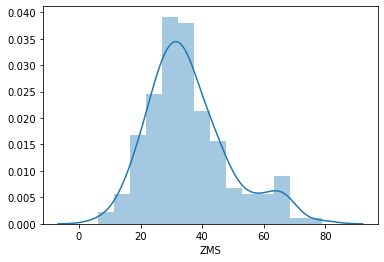

In [147]:
# ZMS 점수 분포확인
sns.distplot(df_gogi.ZMS)

In [148]:
# 회식장소로 갔던 삼백식당의 점수와 등수
df_gogi.sort_values('ZMS',ascending=False,ignore_index=True, inplace=True)
df_gogi[df_gogi.name=='흑돼지삼백식당 서초점']

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,ZMS
124,흑돼지삼백식당 서초점,"육류,고기",서초동 1588-3,2.9,9,57,37.485977,127.014097,582.261755,27.29


In [149]:
# 125등 27.29점...생각보다 저조

## top 음식점

### 지표를 이용한 필터링

In [392]:
# ZMS 점수 top 40을 보자
df_gogi.head(40)

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,ZMS
0,세광양대창 교대본점 본관,"곱창,막창",서초동 1571-19,4.7,63,151,37.491970,127.012569,938.172496,79.05
1,탐라도야지,"육류,고기",서초3동 1566-8,4.0,70,220,37.489555,127.013545,714.110608,69.58
2,세광양대창 교대별관,"곱창,막창",서초동 1567-8,4.9,32,29,37.490135,127.013473,752.296173,68.36
3,자인뭉티기,"육류,고기",서초동 1363-7,4.1,60,22,37.485132,127.032110,1021.365821,67.44
4,교대이층집 본점,"육류,고기",서초동 1571-18,3.6,94,222,37.492047,127.012802,928.260707,67.09
5,버드나무집 서초본점,"육류,고기",서초2동 1340-5,3.2,169,72,37.489067,127.031192,971.901486,66.67
6,육전식당 4호점,"육류,고기",역삼동 823-10,3.9,64,233,37.497988,127.031996,1622.329107,66.59
7,거북곱창,"곱창,막창",서초동 1565-8,3.3,131,64,37.488994,127.013639,679.102070,65.32
8,교대갈비집,갈비,서초동 1574-6,4.1,48,89,37.492158,127.013189,911.580729,64.67
9,강남곱,"곱창,막창",역삼동 830-31,4.0,49,241,37.494326,127.031541,1295.724099,64.06


In [151]:
df_gogi.head(40).name.values

array(['세광양대창 교대본점 본관', '탐라도야지', '세광양대창 교대별관', '자인뭉티기', '교대이층집 본점',
       '버드나무집 서초본점', '육전식당 4호점', '거북곱창', '교대갈비집', '강남곱', '교대곱창',
       '창고43 강남점', '소들녘 서초점', '호남마을', '잰부닥', '가온매운갈비찜', '서초고깃간',
       '연타발 강남역점', '서래갈매기 강남점', '차돌소풍 서초점', '철든놈 제2공장', '화로사랑 서초삼성타운점',
       '한도니 강남역점', '두껍삼 강남직영점', '우면산버드나무집', '장위동유성집 강남점', '교대갈매기', '일품각',
       '돈크레이지', '타잔갈비', '하남돼지집 교대점', '항방양육관 교대2호점', '두껍삼 역삼직영점', '거부',
       '맛찬들왕소금구이 서울도곡점', '강남불백 강남2호점', '진오돌뼈 교대점', '제주몬트락 강남본점', '됐소 강남점',
       '돈블랑 서초교대역점'], dtype=object)

### 부가적인 요소( 리뷰확인, 메뉴, 가격 등)

In [ ]:
# 링크 크롤링

In [155]:
df_40 = pd.read_csv('./0701_gogi_40_link.csv') # 링크
df_40.drop('Unnamed: 0',axis=1,inplace=True)

In [320]:
df_40.head()

,name,link
0,세광양대창 교대본점 본관,https://place.map.kakao.com/1235425275
1,탐라도야지,https://place.map.kakao.com/9475630
2,탐라도야지 강남점,https://place.map.kakao.com/16619900
3,탐라도야지 역삼직영점,https://place.map.kakao.com/16068744
4,세광양대창 교대별관,https://place.map.kakao.com/273188847


In [159]:
# 40위 고기집들의 정보와 링크 결합
df_top40 = pd.merge(df_gogi[:40],df_40,on='name',how='left')
df_top40

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,ZMS,link
0,세광양대창 교대본점 본관,"곱창,막창",서초동 1571-19,4.7,63,151,37.491970,127.012569,938.172496,79.05,https://place.map.kakao.com/1235425275
1,탐라도야지,"육류,고기",서초3동 1566-8,4.0,70,220,37.489555,127.013545,714.110608,69.58,https://place.map.kakao.com/9475630
2,세광양대창 교대별관,"곱창,막창",서초동 1567-8,4.9,32,29,37.490135,127.013473,752.296173,68.36,https://place.map.kakao.com/273188847
3,자인뭉티기,"육류,고기",서초동 1363-7,4.1,60,22,37.485132,127.032110,1021.365821,67.44,https://place.map.kakao.com/9412618
4,교대이층집 본점,"육류,고기",서초동 1571-18,3.6,94,222,37.492047,127.012802,928.260707,67.09,https://place.map.kakao.com/25770215
5,버드나무집 서초본점,"육류,고기",서초2동 1340-5,3.2,169,72,37.489067,127.031192,971.901486,66.67,https://place.map.kakao.com/8323721
6,육전식당 4호점,"육류,고기",역삼동 823-10,3.9,64,233,37.497988,127.031996,1622.329107,66.59,https://place.map.kakao.com/741391811
7,거북곱창,"곱창,막창",서초동 1565-8,3.3,131,64,37.488994,127.013639,679.102070,65.32,https://place.map.kakao.com/11515931
8,교대갈비집,갈비,서초동 1574-6,4.1,48,89,37.492158,127.013189,911.580729,64.67,https://place.map.kakao.com/26878761
9,강남곱,"곱창,막창",역삼동 830-31,4.0,49,241,37.494326,127.031541,1295.724099,64.06,https://place.map.kakao.com/263830255


In [162]:
# 중복제거 및 인덱스 초기화
df_top40.drop_duplicates(inplace=True)
df_top40.reset_index(inplace=True,drop=True)

In [165]:
df_top40

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,ZMS,link
0,세광양대창 교대본점 본관,"곱창,막창",서초동 1571-19,4.7,63,151,37.491970,127.012569,938.172496,79.05,https://place.map.kakao.com/1235425275
1,탐라도야지,"육류,고기",서초3동 1566-8,4.0,70,220,37.489555,127.013545,714.110608,69.58,https://place.map.kakao.com/9475630
2,세광양대창 교대별관,"곱창,막창",서초동 1567-8,4.9,32,29,37.490135,127.013473,752.296173,68.36,https://place.map.kakao.com/273188847
3,자인뭉티기,"육류,고기",서초동 1363-7,4.1,60,22,37.485132,127.032110,1021.365821,67.44,https://place.map.kakao.com/9412618
4,교대이층집 본점,"육류,고기",서초동 1571-18,3.6,94,222,37.492047,127.012802,928.260707,67.09,https://place.map.kakao.com/25770215
5,버드나무집 서초본점,"육류,고기",서초2동 1340-5,3.2,169,72,37.489067,127.031192,971.901486,66.67,https://place.map.kakao.com/8323721
6,육전식당 4호점,"육류,고기",역삼동 823-10,3.9,64,233,37.497988,127.031996,1622.329107,66.59,https://place.map.kakao.com/741391811
7,거북곱창,"곱창,막창",서초동 1565-8,3.3,131,64,37.488994,127.013639,679.102070,65.32,https://place.map.kakao.com/11515931
8,교대갈비집,갈비,서초동 1574-6,4.1,48,89,37.492158,127.013189,911.580729,64.67,https://place.map.kakao.com/26878761
9,강남곱,"곱창,막창",역삼동 830-31,4.0,49,241,37.494326,127.031541,1295.724099,64.06,https://place.map.kakao.com/263830255


In [181]:
from yscl22 import yscl2 # 별점과 날짜를 크롤링해오는 함수

In [292]:
# 날짜와 점수를 갖는 df를 요소롤 갖는 list
# list의 인덱스는 본 df의 인덱스와 같다.
df_list = []
for row in df_top40.index:
    df = pd.DataFrame(yscl2(df_top40.loc[row,'link']),index=['date','score'])
    df_list.append(df.T)
for i in range(40):
    print(i,df_top40.loc[i,'eval_cnt'],len(df_list[i]))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0 63 64
1 70 70
2 32 32
3 60 60
4 94 94
5 169 145
6 64 59
7 131 100
8 48 48
9 49 55
10 159 160
11 61 61
12 33 35
13 41 41
14 53 53
15 27 27
16 20 20
17 30 30
18 19 19
19 25 25
20 52 52
21 14 14
22 25 25
23 28 28
24 35 35
25 14 14
26 13 13
27 30 30
28 11 11
29 10 10
30 20 20
31 23 23
32 24 24
33 27 27
34 14 14
35 24 25
36 14 14
37 33 33
38 11 11
39 11 11


In [314]:
#개수확인
#개수만 크롤링한 날과 별점을 직접 크롤링한 날의 차이로 더 늘어남
for i in range(40):
    print(i,df_top40.loc[i,'eval_cnt'],len(df_list[i]))

0 63 64
1 70 70
2 32 32
3 60 60
4 94 94
5 169 169
6 64 64
7 131 131
8 48 48
9 49 55
10 159 160
11 61 61
12 33 35
13 41 41
14 53 53
15 27 27
16 20 20
17 30 30
18 19 19
19 25 25
20 52 52
21 14 14
22 25 25
23 28 28
24 35 35
25 14 14
26 13 13
27 30 30
28 11 11
29 10 10
30 20 20
31 23 23
32 24 24
33 27 27
34 14 14
35 24 25
36 14 14
37 33 33
38 11 11
39 11 11


In [315]:
# 저장
with open('gogi_40_df.p', 'wb') as file:    # james.p 파일을 바이너리 쓰기 모드(wb)로 열기
    pickle.dump(df_list, file)

#### 분기별 별점

In [416]:
# 세팅
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from time import sleep
%matplotlib notebook

In [414]:
import pickle
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams["figure.figsize"] = (8,4)

In [399]:
# 데이터
with open('gogi_40_df.p','rb') as file:
    df = pickle.load(file)
df_ori = pd.read_csv('gogi_top_40_ori.csv',index_col=False)

In [400]:
df_ori.drop('Unnamed: 0',axis=1,inplace=True)

In [403]:
# 데이터 전처리 5점 --> 5
for i in range(40):
    for x in df[i].index:
        if df[i].loc[x,'score'] == None: # None으로 저장된것 발견 0으로 처리
            df[i].loc[x,'score'] = 0
        df[i].loc[x,'score'] = int(str(df[i].loc[x,'score'])[0])
        if df[i].loc[x,'score'] == 0:
            df[i].loc[x,'score'] = np.nan # 평균값의 영향을 주지 않기위해

In [410]:
df_ori

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,ZMS,link
0,세광양대창 교대본점 본관,"곱창,막창",서초동 1571-19,4.7,63,151,37.491970,127.012569,938.172496,79.05,https://place.map.kakao.com/1235425275
1,탐라도야지,"육류,고기",서초3동 1566-8,4.0,70,220,37.489555,127.013545,714.110608,69.58,https://place.map.kakao.com/9475630
2,세광양대창 교대별관,"곱창,막창",서초동 1567-8,4.9,32,29,37.490135,127.013473,752.296173,68.36,https://place.map.kakao.com/273188847
3,자인뭉티기,"육류,고기",서초동 1363-7,4.1,60,22,37.485132,127.032110,1021.365821,67.44,https://place.map.kakao.com/9412618
4,교대이층집 본점,"육류,고기",서초동 1571-18,3.6,94,222,37.492047,127.012802,928.260707,67.09,https://place.map.kakao.com/25770215
5,버드나무집 서초본점,"육류,고기",서초2동 1340-5,3.2,169,72,37.489067,127.031192,971.901486,66.67,https://place.map.kakao.com/8323721
6,육전식당 4호점,"육류,고기",역삼동 823-10,3.9,64,233,37.497988,127.031996,1622.329107,66.59,https://place.map.kakao.com/741391811
7,거북곱창,"곱창,막창",서초동 1565-8,3.3,131,64,37.488995,127.013639,679.102070,65.32,https://place.map.kakao.com/11515931
8,교대갈비집,갈비,서초동 1574-6,4.1,48,89,37.492158,127.013189,911.580729,64.67,https://place.map.kakao.com/26878761
9,강남곱,"곱창,막창",역삼동 830-31,4.0,49,241,37.494326,127.031541,1295.724099,64.06,https://place.map.kakao.com/263830255


In [412]:
def score_1820(df,n,df_ori): # 한 행씩 넣는다
    list_date = ['{}.{}분기'.format(a,b) for a in [18,19,20] for b in [1,2,3,4]]
    list_avg_score = []
    list_count = []
    s = df[n]
    start = '2018.01'
    for x in ['2018.','2019.','2020.']:
        for y in ['01','04','07','10']:
            recent = x + y
            score_ = s[(s.date>start) & (s.date<=recent)]['score'].mean()
            list_avg_score.append(score_)
            count_ = len(s[(s.date>start) & (s.date<=recent)])
            list_count.append(count_)
            start = recent
    df_ = pd.DataFrame({'score':list_avg_score[1:-1],
                        'count':list_count[1:-1]},
                       index=list_date[:-2])
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    score_line = df_.score.plot(ax=ax1,color='r',alpha=0.7, label='score',legend=True)
    count_bar = df_['count'].plot.bar(ax=ax2, color='k',alpha=0.3, label='count',legend=True)
    plt.legend(loc=2)
    ax2.set_title(df_ori.loc[n,'name'])
    
    # 축 세팅
    ax1.set_ylim(0,5.5)
    ax2.set_ylim(0,16.5)
    ax2.set_yticks([0,3,6,9,12,15])
    ax1.set_ylabel('score',rotation=0,labelpad=20)
    ax2.set_ylabel('count',rotation=0,labelpad=20)
    ax1.yaxis.grid(True,)

<IPython.core.display.Javascript object>


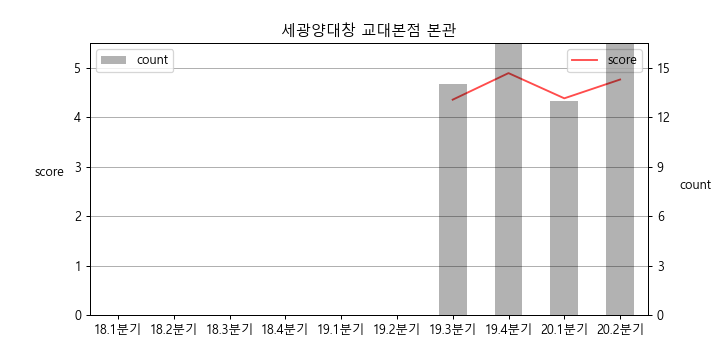

<IPython.core.display.Javascript object>


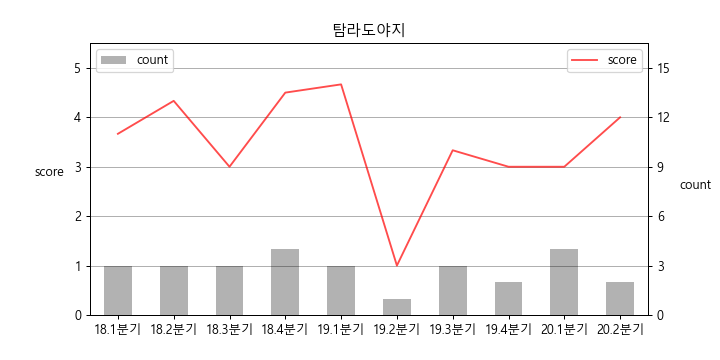

<IPython.core.display.Javascript object>


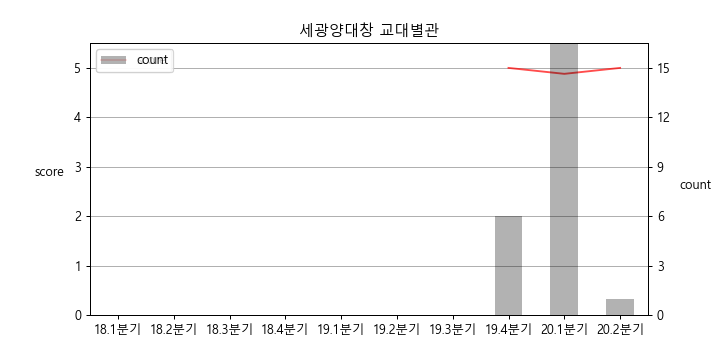

<IPython.core.display.Javascript object>


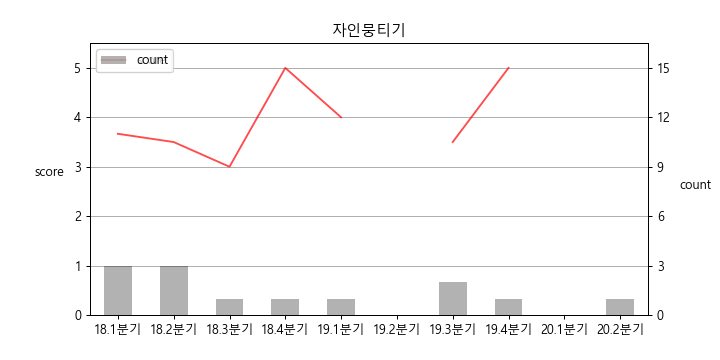

<IPython.core.display.Javascript object>


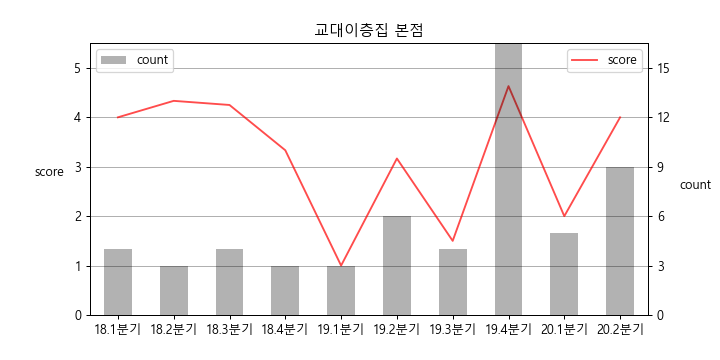

<IPython.core.display.Javascript object>


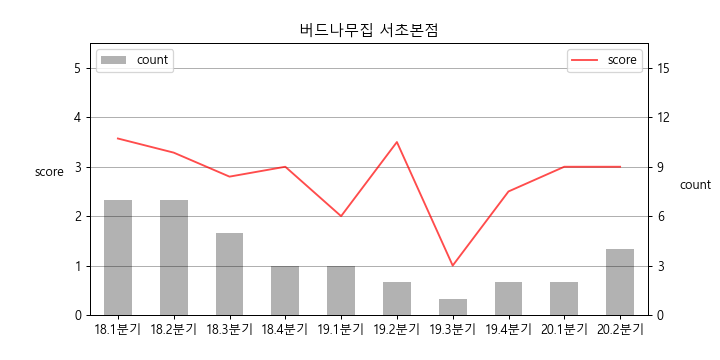

<IPython.core.display.Javascript object>


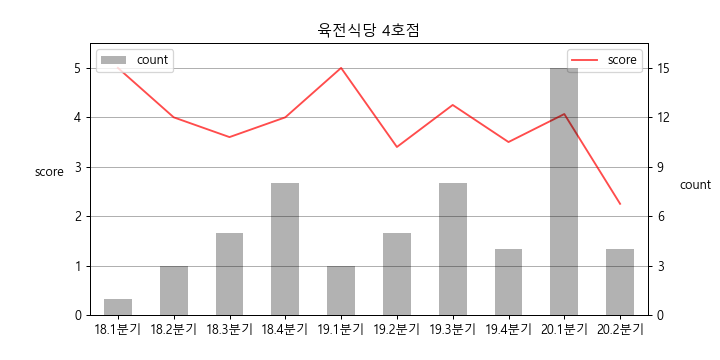

<IPython.core.display.Javascript object>


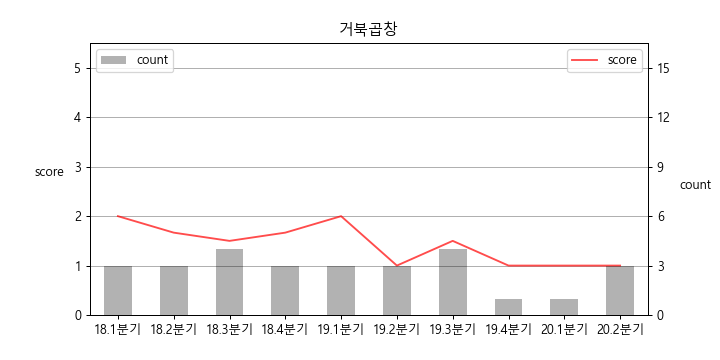

<IPython.core.display.Javascript object>


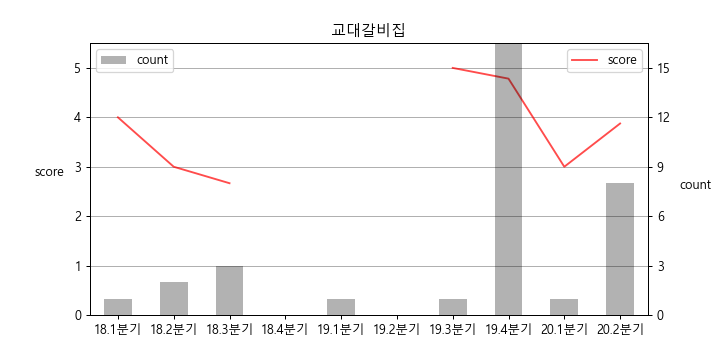

<IPython.core.display.Javascript object>


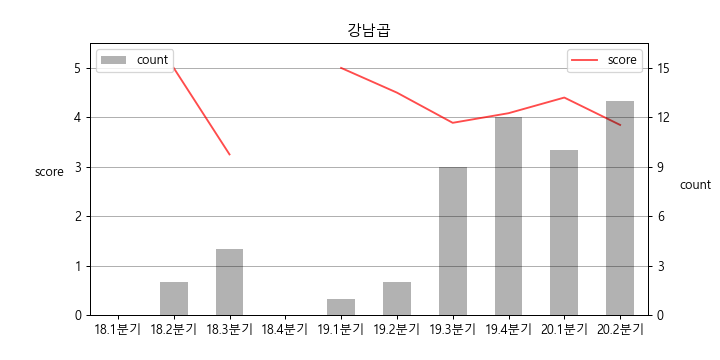

<IPython.core.display.Javascript object>


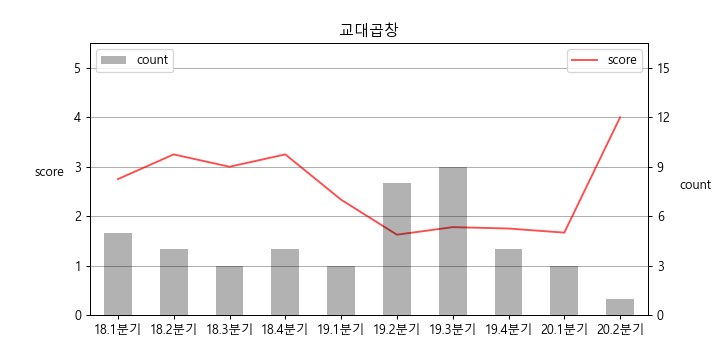

<IPython.core.display.Javascript object>


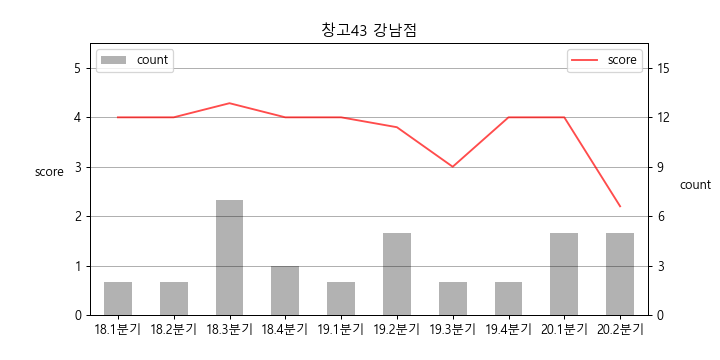

<IPython.core.display.Javascript object>


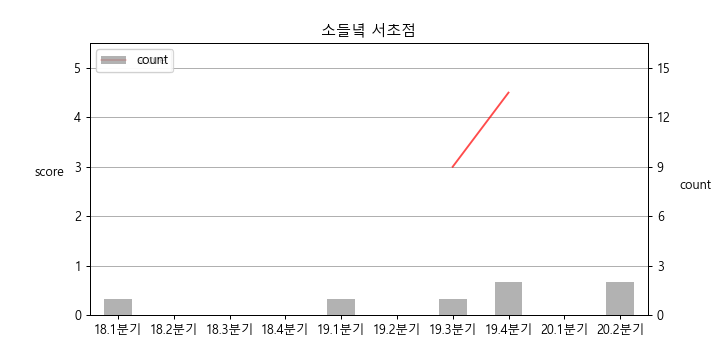

<IPython.core.display.Javascript object>


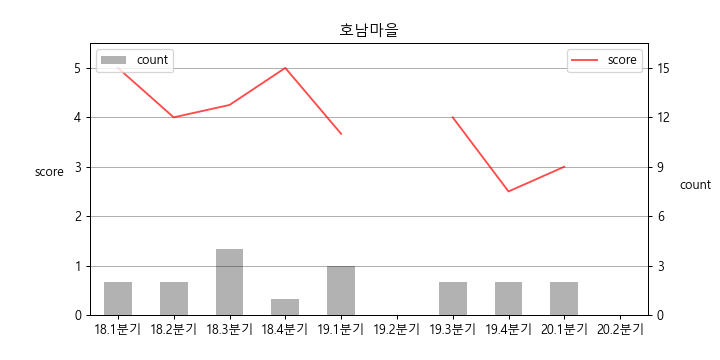

<IPython.core.display.Javascript object>


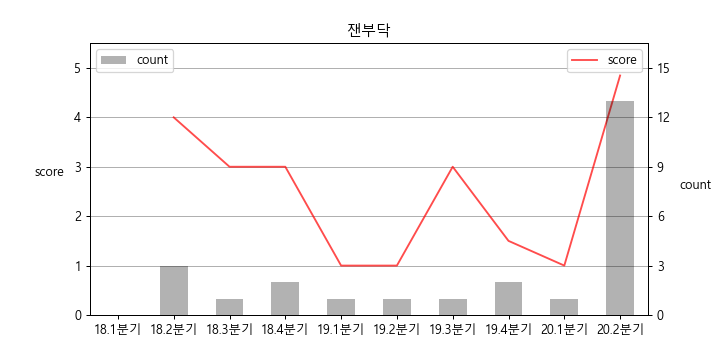

<IPython.core.display.Javascript object>


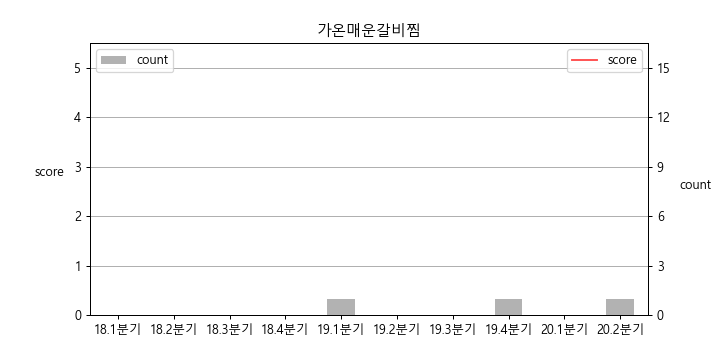

<IPython.core.display.Javascript object>


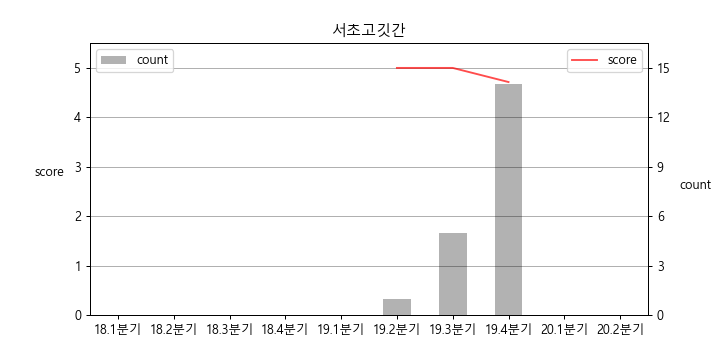

<IPython.core.display.Javascript object>


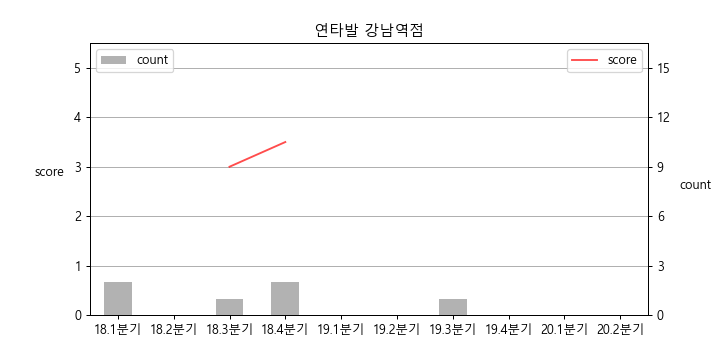

<IPython.core.display.Javascript object>


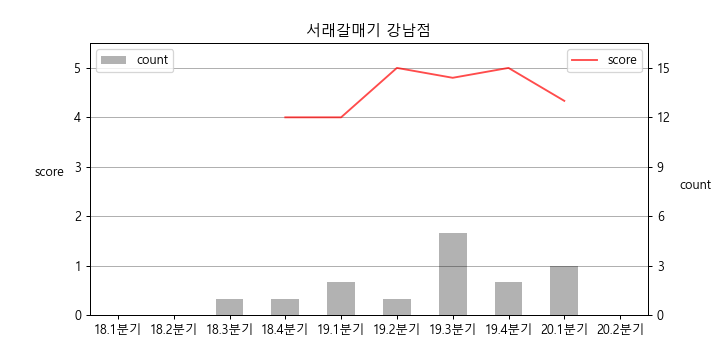

<IPython.core.display.Javascript object>


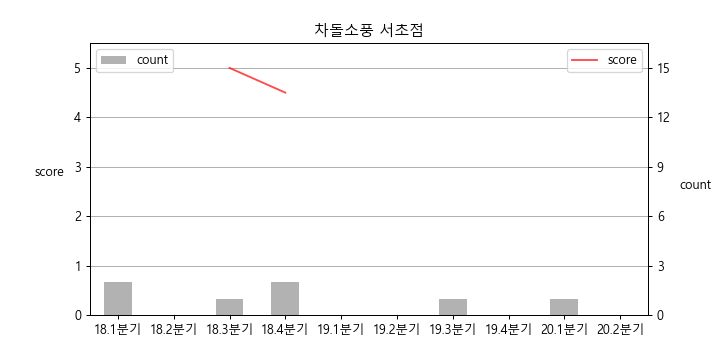

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


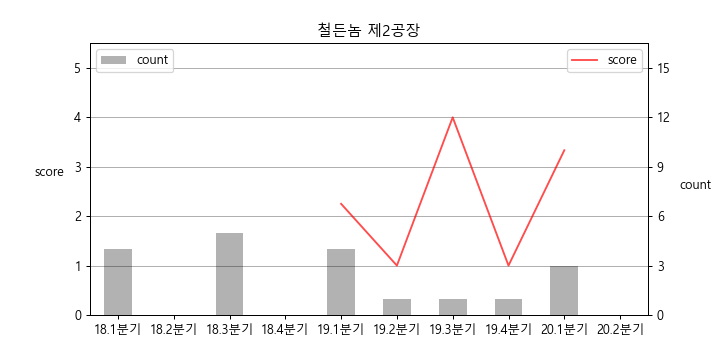

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


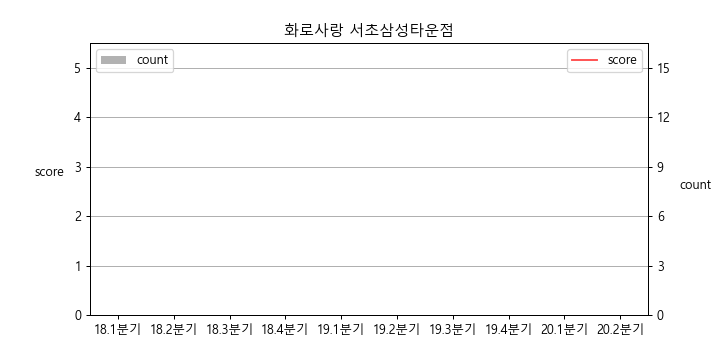

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


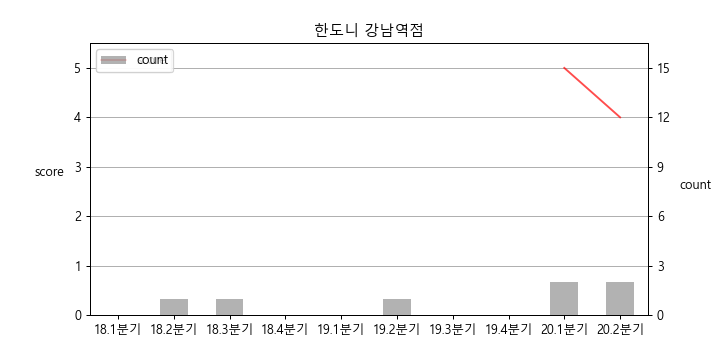

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


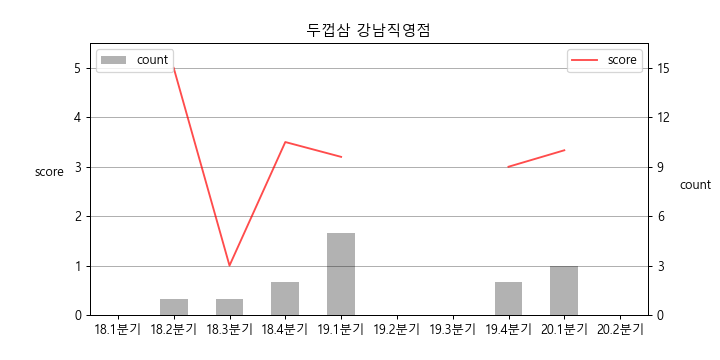

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


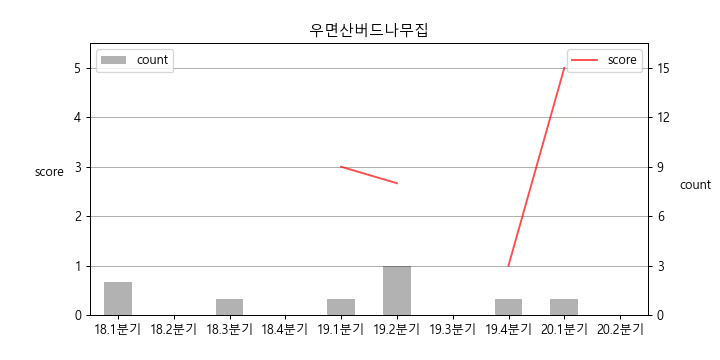

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


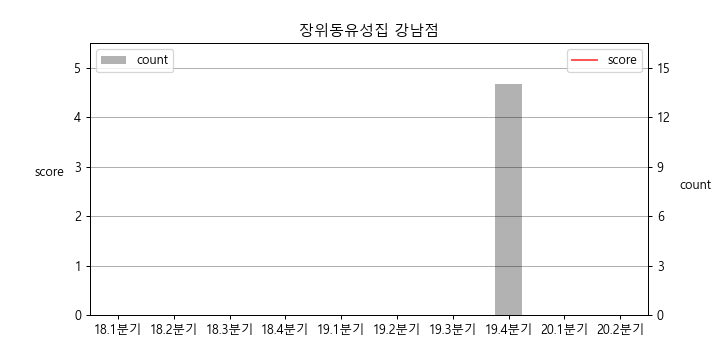

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


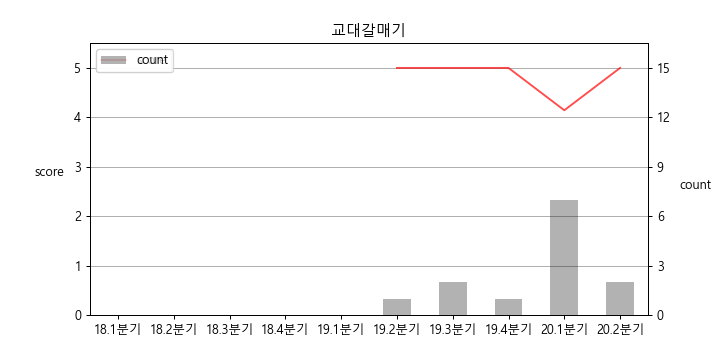

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


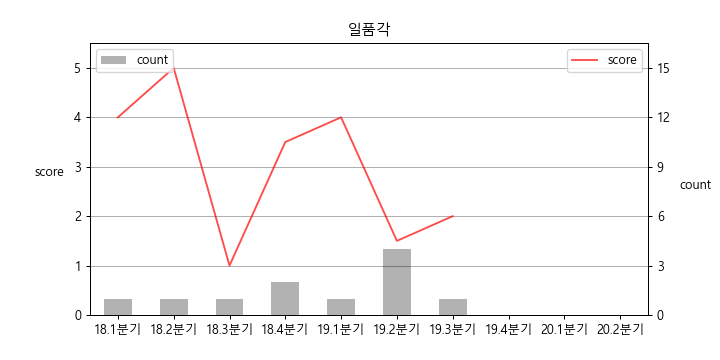

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


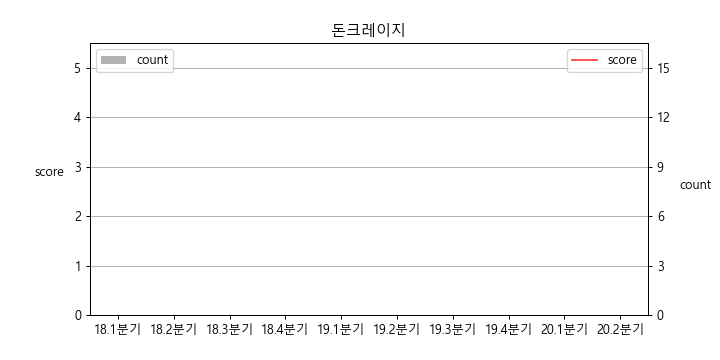

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


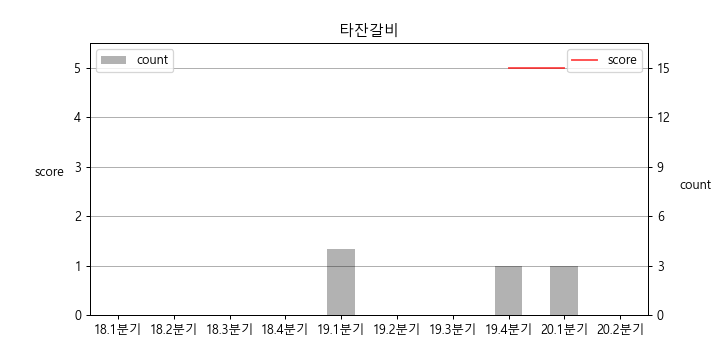

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


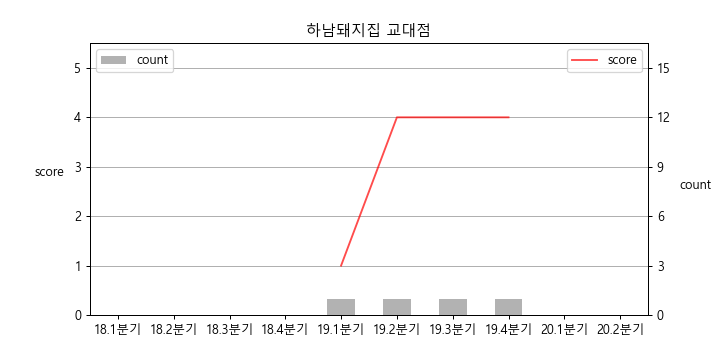

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


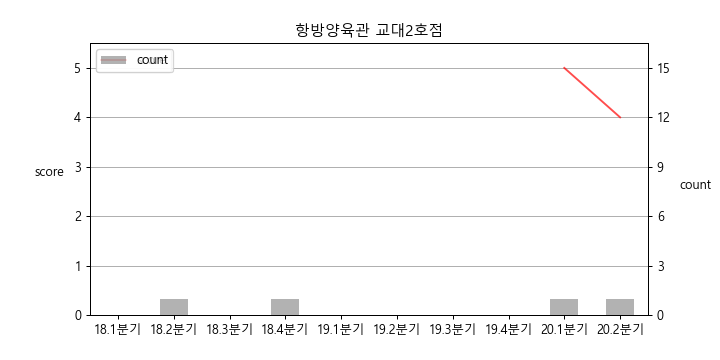

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


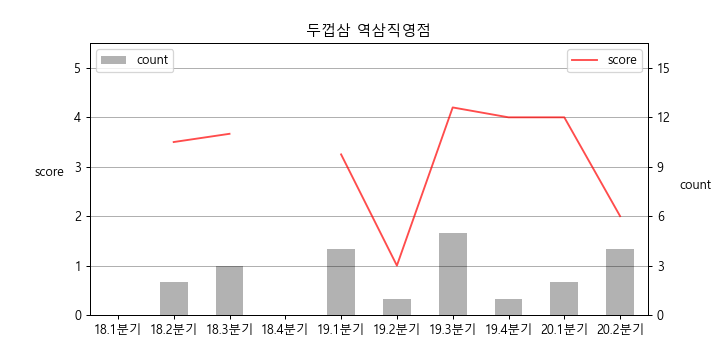

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


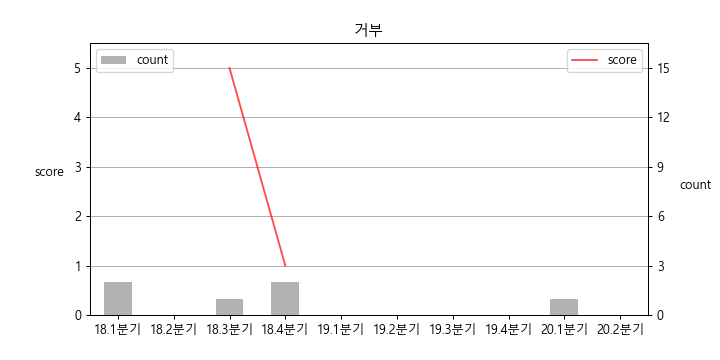

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


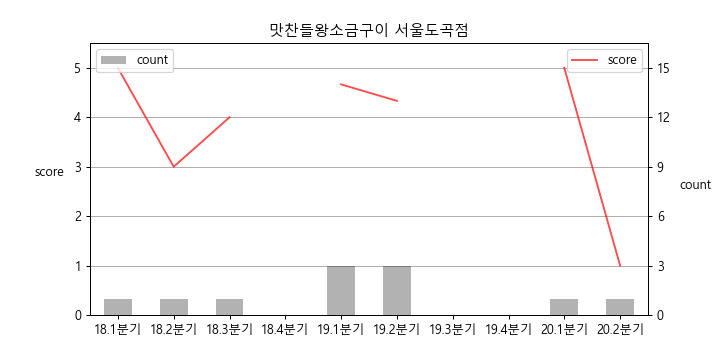

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


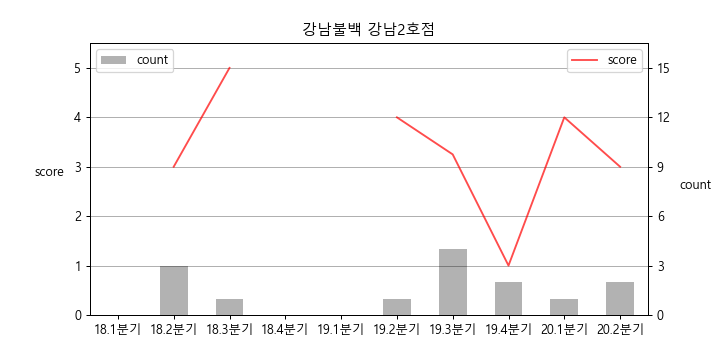

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


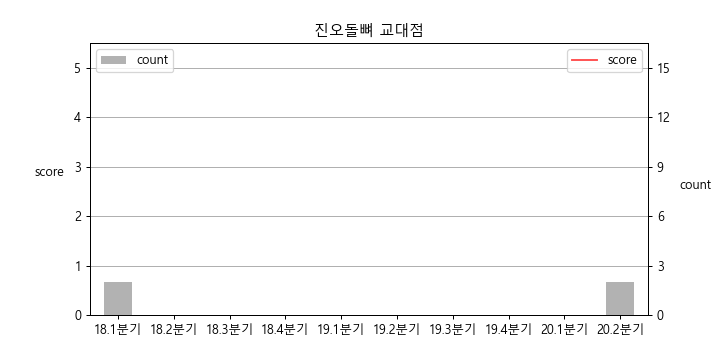

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


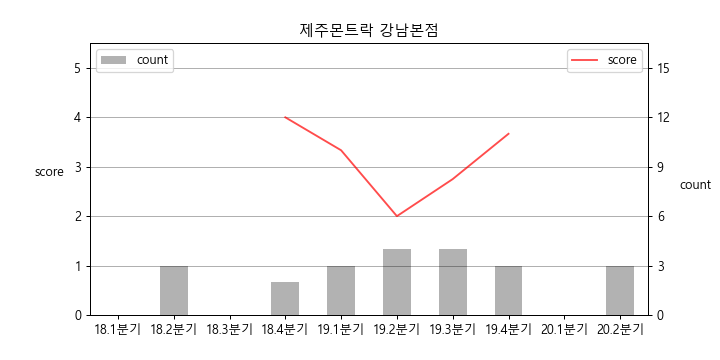

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


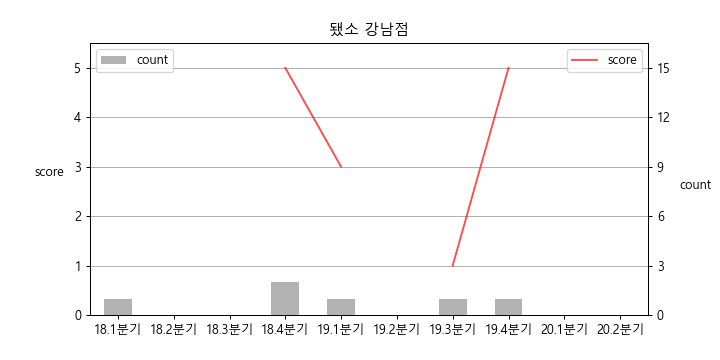

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


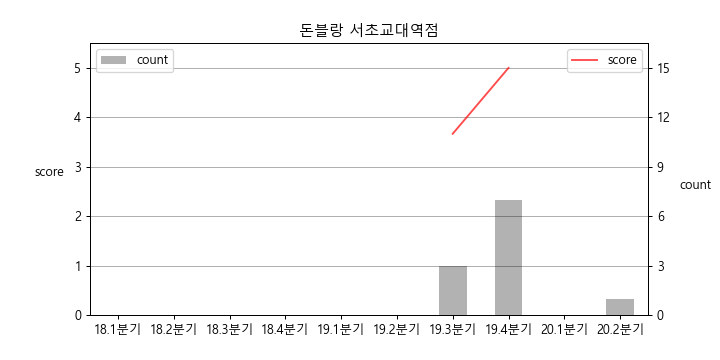

In [428]:
for n in range(40):
    score_1820(df,n,df_ori) # top 40 그래프로 보기

## 학원근처 찾아보기

In [397]:
# 학원긑처 칮아보기
df_gogi[df_gogi.distance<700].head(40)

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,ZMS
7,거북곱창,"곱창,막창",서초동 1565-8,3.3,131,64,37.488994,127.013639,679.102070,65.32
10,교대곱창,"곱창,막창",서초동 1578-3,3.0,159,161,37.488640,127.014238,614.892035,62.41
24,우면산버드나무집,"육류,고기",서초동 1425-13,3.4,35,8,37.482864,127.019524,416.380174,48.53
31,항방양육관 교대2호점,양꼬치,서초동 1577-5,3.6,23,35,37.489028,127.013914,658.602510,46.22
45,찜통 남부터미널점,"육류,고기",서초동 1457-2,2.8,38,32,37.484346,127.014441,598.827285,41.86
58,감격시대,"육류,고기",서초동 1579-4,2.9,22,135,37.488501,127.013704,653.180119,37.92
69,해방촌HBC고깃집 남부터미널점,"육류,고기",서초동 1621-27,4.6,7,4,37.486045,127.015861,426.697086,35.92
74,부일갈비 본점,갈비,서초동 1427-6,4.3,7,52,37.483864,127.019691,305.202031,35.03
80,사람사는 고깃집 김일도 서초점,"육류,고기",서초동 1594-3,3.9,8,105,37.486548,127.013985,589.236247,34.43
96,굴뚝집 남부터미널점,"육류,고기",서초동 1589-13,3.6,8,115,37.485658,127.013460,642.393712,32.05


In [427]:
%matplotlib notebook